In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np 
import random
from scipy.spatial import distance_matrix

In [10]:
data=load_iris()
X=data['data']
y=data['target']

In [11]:
D=distance_matrix(X,X)

In [70]:
class DataBot:
    def __init__(self, position,_):
        self.position = position
        self.payoff = 0
        # self.update_payoff()
        self.ind=_

    def update_payoff(self, R, D,databots):
        weight=np.array([H_weight(distance_2D_polar(self.position,r.position),R) for r in databots])
        # print(weight.shape)
        self.payoff=np.average(D[self.ind,:],weights=weight)

def H_weight(r,R):
    result=0
    rs=r/(np.pi*R*R)
    if rs<1:
        result=1-rs
    return result 
def distance_2D_polar(a,b):
    x=polar_to_cartesian(a)
    y=polar_to_cartesian(b)
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def initialize_databots(N, grid_size,D,R_max):
    databots = []
    for _ in range(N):
        position = (random.uniform(0, grid_size[0]), random.uniform(0, 2 * np.pi))
        databots.append(DataBot(position,_))
        # print(databots.shape)
    updata_all_payoff(R_max,D,databots)
    return databots


def updata_all_payoff(R_max,D,databots):
    for _ in databots:
        _.update_payoff(R_max,D,databots)

def calculate_payoff(databot):
    return sum([_.payoff for _ in databot])

def chance(R,max_range=0,min_range=0):
    return R

def update_positions(databots, R, c_R,D, grid_size):
    for databot in databots:
        if random.random() < c_R:
            new_p=(random.uniform(0, R), random.uniform(0, 2 * np.pi))
            d=DataBot(new_p,databot.ind)
            d.update_payoff(R,D,databots)
            if d.payoff>databot.payoff:
                databot.position=d.position
                databot.payoff=d.payoff
def polar_to_cartesian(polar_pos):
    r, phi = polar_pos
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return (x, y)            
            
def pswarm(databots, D, Rmax, Rmin):
    grid_size = (len(D), len(D[0])) 
    for e in range(int(Rmax),Rmin):
        c_R =chance(e)
        L=calculate_payoff(databots)+1000
        while np.abs(L-calculate_payoff(databots))<L*0.05:
            L=calculate_payoff(databots)
            update_positions(databots, e, c_R, grid_size)
    return databots

grid_size =D.shape
N = 150 
Rmax = grid_size[0] / 2
Rmin = 5
# epochs = 1000

databots = initialize_databots(N, grid_size,D=D,R_max=Rmax)
print(calculate_payoff(databots))
final_databots = pswarm(databots, D=D, Rmax=Rmax, Rmin=Rmin)
print(calculate_payoff(final_databots))


379.1403683011338
379.1403683011338


In [61]:
# weight=np.array([H_weight(distance_2D_polar(self.position,r.position),5) for r in databots])
# list(range(Rmax,Rmin))
# s=[polar_to_cartesian(r.position) for r in final_databots]
# s
calculate_payoff(initialize_databots(N, grid_size,D=D,R_max=Rmax))


379.11973056709263

In [64]:
calculate_payoff(final_databots)

379.1169653252283

In [33]:
D[5,:].shape
we
np.average(D[5,:],weights=weight)

3.5992129744220835

In [ ]:

# def initialize_databots(N, O):
#     # Place DataBots at initial random positions within the grid O
#     databots = [DataBot((np.random.rand(), 2 * np.pi * np.random.rand())) for _ in range(N)]
#     return databots



def calculate_distances(databots):
    # Calculate the distance matrix D for all databots based on their positions
    pass

def sample_databots(databots, c_R):
    # Randomly choose a subset of databots for possible position updates based on c(R)
    pass

def determine_new_positions(databots, R, D):
    # For each sampled databot, determine new possible positions with uniform randomness,
    # then evaluate the best position based on a given scent/payoff function
    pass

def calculate_global_happiness(databots):
    # Sum up the 'happiness' or payoff of all databots to check for the equilibrium
    return np.sum([_.payoff for _ in databots])

def PSwarm(D, Rmax, Rmin, L, C):
    N = len(D)
    O = (L, C)  # Output space size
    databots = initialize_databots(N, O)
    R = Rmax
    
    while R >= Rmin:
        calculate_distances(databots)
        c_R = calculate_chance_function(R, N)  # c(R) should decrease with time
        sampled_databots = sample_databots(databots, c_R)
        determine_new_positions(sampled_databots, R, D)
        
        if equilibrium_condition_met(databots):
            R -= 1  # Decrease radius based on equilibrium
        
        cartesian_positions = [polar_to_cartesian(db.position) for db in databots]
    
    return cartesian_positions

# Following are simplified placeholders for the actual implementation
def calculate_chance_function(R, N):
    pass

def equilibrium_condition_met(databots):
    pass

# Assuming the distance matrix D has been provided or calculated
# You'll need to supply your own D based on your data

L, C = 100, 100  # Assuming a lattice of 100x100 for demonstration purposes
Rmax = L / 2 if L < C else C / 2
Rmin = 5  # As described

cartesian_positions = PSwarm(dist_mat, Rmax, Rmin, L, C)

In [5]:
dist_mat.shape

(150, 150)

In [3]:

from minisom import MiniSom
# Define the size of the SOM grid
som_grid_rows = 10
som_grid_columns = 10

# Define the input dimension (number of features in the dataset)
input_dimension =4

# Initialize the SOM
som = MiniSom(som_grid_rows, som_grid_columns, input_dimension, sigma=1.0, learning_rate=0.5)

# Train the SOM using your dataset
som.train_random(X, 100)  # 100 is the number of iterations for training

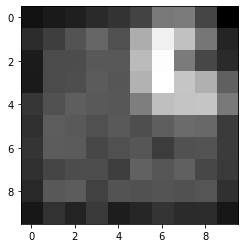

In [4]:
u_matrix = som.distance_map()
import matplotlib.pyplot as plt
u_mat= compute_generalized_umatrix(som)
plt.imshow(u_matrix, cmap='gray')
plt.show()

In [6]:
u_matrix.shape

(10, 10)